## Data Preparation

- Prepare a well-structured dataset for Data generator

### Import Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd 

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Prepare Dataset
#### Import Dataset

In [3]:
df = pd.read_csv('../Datasets/Facial_Expressions/legend.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,user.id,image,emotion
0,dwdii,John_Snow_0004.jpg,happiness
1,dwdii,Robert_Blake_0005.jpg,happiness
2,dwdii,Roy_Moore_0005.jpg,neutral
3,302,George_Robertson_0013.jpg,neutral
4,302,Ali_Naimi_0005.jpg,neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13690 entries, 0 to 13689
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user.id  13690 non-null  object
 1   image    13690 non-null  object
 2   emotion  13690 non-null  object
dtypes: object(3)
memory usage: 321.0+ KB


In [5]:
def lower(s):
    return s.lower().strip()

In [6]:
df['emotion'] = df['emotion'].apply(lambda x: lower(x))

#### Emotion Distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [8]:
value = dict(df['emotion'].value_counts())
value = {key : value[key] for key in sorted(value.keys())} 
print(value)

{'anger': 252, 'contempt': 9, 'disgust': 208, 'fear': 21, 'happiness': 5696, 'neutral': 6868, 'sadness': 268, 'surprise': 368}


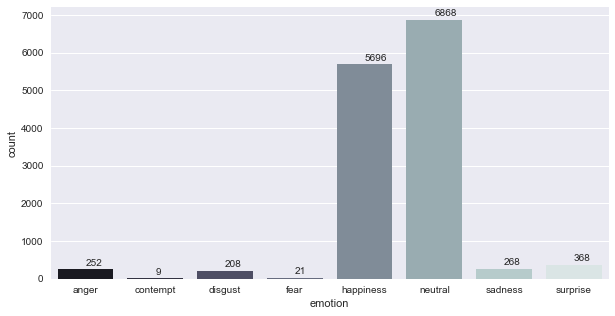

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.countplot(df['emotion'], palette='bone', order=value.keys())

for i,val in enumerate(value.values()):
    ax.text(i,val+100,val)

plt.show()

- We can Observe that there is ahuge imbalance in dataset.
- We will fix it later by data augmentation.

#### Structerized Data

In [10]:
import shutil

In [11]:
path = '../Datasets/Facial_Expressions/'
train = os.path.join(path,'train')

if not os.path.exists(train):
    os.mkdir(train)
    print('train - Directory Created')
else:
    #if train already exits then we will delete contents of the directory
    for sub_folder in os.listdir(train):
        files = glob.glob(train + '/' + sub_folder + '/*')
        for file in files:
            os.remove(file)
                
    print('train - Directory Exists')

train - Directory Exists


- Due to limited resources, we will take only max 500 images for each class.
- Later we will use `Image Augmentation` techniques to extend images upto 1000 for each class.
----
- If You have GPU support, then you can skip this step

In [12]:
# Copying images
for idx, row in df.iterrows():
    img = row['image']       #picture name
    emo = row['emotion']     #picture label or emition
    
    folder = os.path.join(train,emo)
    if not os.path.exists(folder):
        os.mkdir(folder)
        src = os.path.join(path,'images',img)
        shutil.copy(src,folder)
    else:
        files = glob.glob(folder+'/*')
        
        if len(files) <= 500:
            src = os.path.join(path,'images',img)
            shutil.copy(src,folder)
        
    if (idx+1)%1000 == 0:
        print(f'Copying Images: {idx+1}/{len(df)}')
        
print('Completed !!')

Copying Images: 1000/13690
Copying Images: 2000/13690
Copying Images: 3000/13690
Copying Images: 4000/13690
Copying Images: 5000/13690
Copying Images: 6000/13690
Copying Images: 7000/13690
Copying Images: 8000/13690
Copying Images: 9000/13690
Copying Images: 10000/13690
Copying Images: 11000/13690
Copying Images: 12000/13690
Copying Images: 13000/13690
Completed !!
